# Project 2
In this project you are going to predict the overall rating of soccer player based on their attribute such as 'crossing', 'finishing' etc.
The dataset you are going to use is from European Soccer Database https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.
Download the data in the same folder and run the following commmand to get it in the environment

Getting Started:
In this project we are going to predict the overall rating of soccer player based on their attribute such as 'crossing', 'finishing' etc.
We are using an open dataset from the popular site Kaggle. This European Soccer Database has more than 25,000 matches and more than 10,000 players for European professional soccer seasons from 2008 to 2016.
To get started, we will need to:

Download the data from: https://www.kaggle.com/hugomathien/soccer 
Extract the zip file called "soccer.zip"

About the Dataset

The ultimate Soccer database for data analysis and machine learning

The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.

1.25,000 matches
2.10,000 players
3.11 European Countries with their lead championship
4.Seasons 2008 to 2016
5.Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
6.Team line up with squad formation (X, Y coordinates)
7.Betting odds from up to 10 providers
8.Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches

The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset. Python skills required to complete this project

SQL:
The data is in SQL database so students need to retrive using query language. They also need to know how to connect SQL database woth python. The library we are using for this in 'sqlite3'. 1/19/2018 ML Project(Updated) (1) http://localhost:8888/notebooks/20th%20Januray/ML%20Project(Updated)%20(1).ipynb# 2/4 SQLite3 can be integrated with Python using sqlite3 module, which was written by Gerhard Haring. It provides an SQL interface compliant with the DB-API 2.0 specification described by PEP 249. You do not need to install this module separately because it is shipped by default along with Python version 2.5.x onwards.

To use sqlite3 module, you must first create a connection object that represents the database and then optionally you can create a cursor object, which will help you in executing all the SQL statements. Pandas:

Pandas:
Pandas is an open-source, BSD-licensed Python library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language. Python with Pandas is used in a wide range of fields including academic and commercial domains including finance, economics, Statistics, analytics, etc.In this tutorial, we will learn the various features of Python Pandas and how to use them in practice. Scikit Learn Sci-kit

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python.
The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn. This stack that includes:

NumPy: Base n-dimensional array package SciPy: Fundamental library for scientific computing Matplotlib: Comprehensive 2D/3D plotting IPython: Enhanced interactive console Sympy: Symbolic mathematics Pandas: Data structures and analysis
Extensions or modules for SciPy care conventionally named SciKits. As such, the module provides learning algorithms and is named scikit-learn.
The vision for the library is a level of robustness and support required for use in production systems. This means a deep focus on concerns such as easy of use, code quality, collaboration, documentation and performance. Machine Learning skills required to complete the Project Supervised learning

Supervised learning deals with learning a function from available training data. A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. Regression

Regression is a parametric technique used to predict continuous (dependent) variable given a set of independent variables. It is parametric in nature because it makes certain assumptions (discussed next) based on the data set. If the data set follows those assumptions, regression gives incredible results. Model evaluation

We must know how to judge a model on unseen data. What metric to select to judge the performance

# Importing the Required libraries

In [19]:
import mysql
import numpy as np
import pandas as pd
%matplotlib notebook
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression                   

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import train_test_split.

import seaborn as sns
import pickle

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

# Reading the sql database

In [30]:
cnx=sqlite3.connect('database.sqlite')  # creating connection

In [31]:
df = pd.read_sql_query("SELECT * FROM Player_Attributes", cnx) # Loading dataframe with data from the Player_Attributes Table

df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [46]:
df.shape

(180354, 42)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 42 columns):
id                     180354 non-null int64
player_fifa_api_id     180354 non-null int64
player_api_id          180354 non-null int64
date                   180354 non-null object
overall_rating         180354 non-null float64
potential              180354 non-null float64
preferred_foot         180354 non-null object
attacking_work_rate    180354 non-null object
defensive_work_rate    180354 non-null object
crossing               180354 non-null float64
finishing              180354 non-null float64
heading_accuracy       180354 non-null float64
short_passing          180354 non-null float64
volleys                180354 non-null float64
dribbling              180354 non-null float64
curve                  180354 non-null float64
free_kick_accuracy     180354 non-null float64
long_passing           180354 non-null float64
ball_control           180354 non-null float64
accele

# Droping NAN values

In [48]:
df = df.dropna()

In [49]:
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE

In [50]:
df_new = df.copy()

In [51]:
df_new = df_new.select_dtypes(["int64","float64"])  # Return a subset of the DataFrame’s columns based on the column dtypes.

In [52]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 38 columns):
id                    180354 non-null int64
player_fifa_api_id    180354 non-null int64
player_api_id         180354 non-null int64
overall_rating        180354 non-null float64
potential             180354 non-null float64
crossing              180354 non-null float64
finishing             180354 non-null float64
heading_accuracy      180354 non-null float64
short_passing         180354 non-null float64
volleys               180354 non-null float64
dribbling             180354 non-null float64
curve                 180354 non-null float64
free_kick_accuracy    180354 non-null float64
long_passing          180354 non-null float64
ball_control          180354 non-null float64
acceleration          180354 non-null float64
sprint_speed          180354 non-null float64
agility               180354 non-null float64
reactions             180354 non-null float64
balance              

In [53]:
X = df_new.drop('overall_rating',axis=1).values
y = df_new['overall_rating'].values.ravel()

# Preprocessing the data

In [54]:
from sklearn.preprocessing import scale
X = scale(X)

In [55]:
df_1 = df_new.drop('overall_rating',axis=1)

# Feature Selection using RFE Scikit Library

In [56]:
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 10)
rfe_fit = rfe.fit(X, y)
features = []
for feat in df_1.columns[rfe_fit.support_]:
    print(feat)
    features.append(feat)

player_api_id
potential
heading_accuracy
short_passing
ball_control
reactions
strength
gk_diving
gk_kicking
gk_positioning


# check the model with 15 features

In [57]:
lm = LinearRegression()

rfe = RFE(lm, n_features_to_select = 15)
rfe_fit = rfe.fit(X, y)
features = []
for feat in df_1.columns[rfe_fit.support_]:
    print(feat)
    features.append(feat)

player_fifa_api_id
player_api_id
potential
heading_accuracy
short_passing
ball_control
acceleration
reactions
strength
marking
gk_diving
gk_handling
gk_kicking
gk_positioning
gk_reflexes


# Using Statsmodels for analysing the impact of attribute potential on the player rating

In [58]:
import statsmodels.formula.api as sm
model1 = sm.OLS(df_new['overall_rating'],df_new['potential'])
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 4.062e+07
Date:                Wed, 10 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:33   Log-Likelihood:            -5.3063e+05
No. Observations:              180354   AIC:                         1.061e+06
Df Residuals:                  180353   BIC:                         1.061e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
potential      0.9331      0.000   6373.716      0.0

# Using Statsmodels for analysing the impact of all attribute on the player rating

In [59]:
X_new = df_new[features].values
model = sm.OLS(df_new['overall_rating'],df_new[features])
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:         overall_rating   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 8.035e+06
Date:                Wed, 10 Oct 2018   Prob (F-statistic):               0.00
Time:                        08:21:53   Log-Likelihood:            -4.3282e+05
No. Observations:              180354   AIC:                         8.657e+05
Df Residuals:                  180339   BIC:                         8.658e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
player_fifa_api_id -8.998e-06   1.44

# Regressiom plots

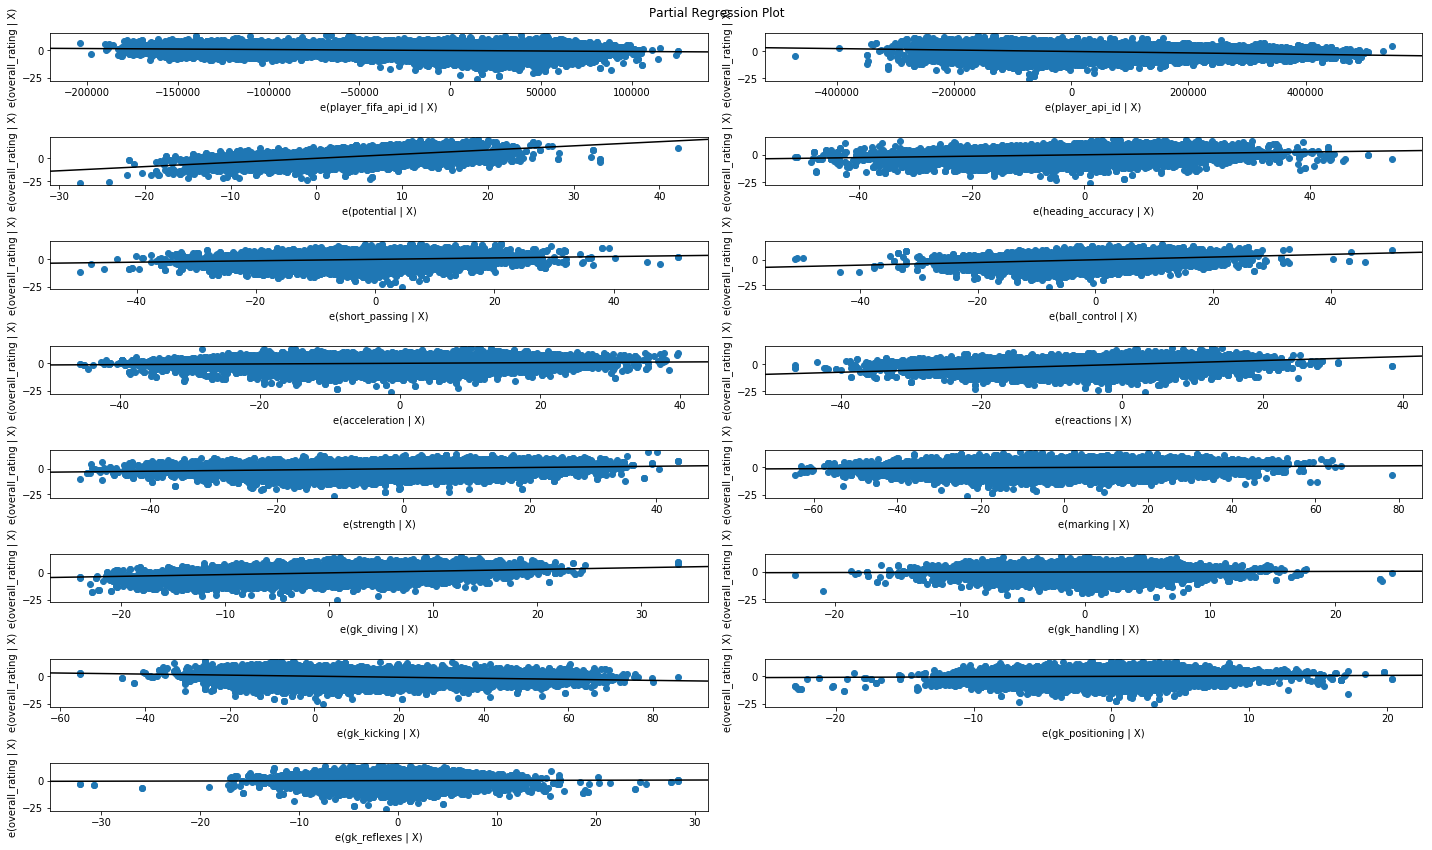

In [60]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
fig = plt.figure(figsize=(20,12))
fig = sm.graphics.plot_partregress_grid(result, fig=fig)

In [74]:
import statsmodels.formula.api as smf                  

lm = smf.ols(formula='overall_rating ~  player_fifa_api_id + player_api_id +potential +heading_accuracy +short_passing +ball_control +acceleration +reactions +strength +marking +gk_diving +gk_handling +gk_kicking +gk_positioning +gk_reflexes ', data=df_new).fit()

print('Confidence of the statsmodel for the input data : ',lm.rsquared)

Confidence of the statsmodel for the input data :  0.8561047414083595


# Split the input data into training and test data

In [62]:
from sklearn.model_selection import train_test_split        #spliting 66.66% for train data and 33.33% for test data.

X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.33,random_state=0)

print("X_train Shape : ",X_train.shape)
print("X_test Shape : ",X_test.shape)
print("Y_train Shape : ",Y_train.shape)
print("Y_test.shape : ",Y_test.shape)

X_train Shape :  (120837, 37)
X_test Shape :  (59517, 37)
Y_train Shape :  (120837,)
Y_test.shape :  (59517,)


# Applying Linear Regression Model

In [63]:
lm = LinearRegression()
lm.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Prediction using Linear Regression Model

In [64]:
Y_pred = lm.predict(X_test)

In [65]:
Y_pred

array([73.74672865, 68.65401302, 67.22132467, ..., 71.6247244 ,
       64.76934151, 62.18654694])

In [66]:
print("The variance score of the LinearRegression model is  : ",lm.score(X_test,Y_test))

The variance score of the LinearRegression model is  :  0.8593275836597537


# Evaluate Linear Regression Accuracy using Root Mean Square Error

In [67]:
from sklearn.metrics import mean_squared_error
print("Error Rate of the Regression Model : ",sqrt(mean_squared_error(Y_pred,Y_test)))

Error Rate of the Regression Model :  2.6234739118445694


# Applying Decision Tree Regressor Model

In [68]:
regressor  = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [69]:
Y_pred = regressor.predict(X_test)

In [70]:
Y_pred

array([76.        , 72.        , 67.        , ..., 71.        ,
       62.        , 61.78571429])

In [71]:
print("The variance score of the DecisionTreeRegressor model is  : ",regressor.score(X_test,Y_test))

The variance score of the DecisionTreeRegressor model is  :  0.9547533920968547


Text(0.5,1,'Actual vs Predicted Rating for DecisionTreeRegressor Model')

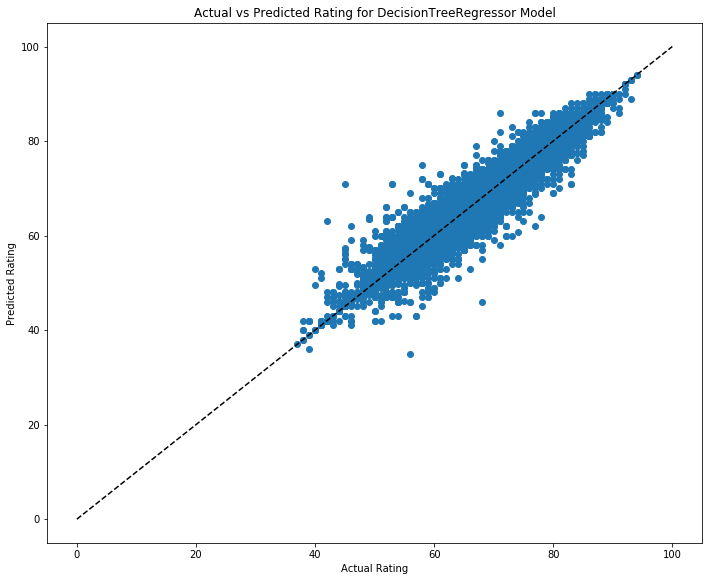

In [72]:
plt.figure(figsize=(10, 8))
plt.scatter(Y_test, Y_pred)
plt.plot([0, 100], [0, 100], '--k')
plt.axis('tight')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.tight_layout()
plt.title("Actual vs Predicted Rating for DecisionTreeRegressor Model")

# Evaluate Linear Regression Accuracy using Root Mean Square Error For DecisionTreeRegressor mode

In [73]:
print("Error Rate of the DecisionTreeRegressor Model : ",sqrt(mean_squared_error(Y_pred,Y_test)))

Error Rate of the DecisionTreeRegressor Model :  1.487871034821717


The DecisionTreeRegressor Model performs better than the LinearRegression Model as eveident from the error rate

# Obtaining predictions by cross-validation for the Regression Models

In [76]:
df_optm = df_new.copy()
df_optm['rating'] = y
df_optm.head()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rating
0,1,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
1,2,218353,505942,67.0,71.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,67.0
2,3,218353,505942,62.0,66.0,49.0,44.0,71.0,61.0,44.0,...,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,62.0
3,4,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0
4,5,218353,505942,61.0,65.0,48.0,43.0,70.0,60.0,43.0,...,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,61.0


In [77]:
from sklearn.model_selection import cross_val_predict
X = df_optm.drop('rating',axis=1)
Y = df_optm['rating']
predicted = cross_val_predict(regressor, X, Y, cv=10)

In [78]:
from sklearn.metrics import accuracy_score
print( "Accuracy Score of the DecisionTreeRegressor Model is  : " ,accuracy_score(Y.astype(int), predicted) )

Accuracy Score of the DecisionTreeRegressor Model is  :  0.9998336604677468


# Calculate Error using K-Fold Cross validation

In [79]:
from sklearn.cross_validation import KFold
kfold = KFold(len(df_optm),n_folds=10,shuffle=True,random_state=0)

In [80]:
from sklearn.metrics import mean_absolute_error
lm = LinearRegression()
mean_abs_error = []
accuracy_score = []
for train,test in kfold:
    x = X.iloc[train]
    y = Y.iloc[train]
    lm.fit(x,y)
    Y_test = Y.iloc[test]
    Y_pred = lm.predict(X.iloc[test])
    mean_abs_error.append(mean_absolute_error(Y_test,Y_pred))

In [81]:
print('10 Fold Cross Validation Error : {} accuracy score : {}  for LinearRegression Model '.format(np.mean(mean_abs_error),1 - np.mean(mean_abs_error)))

10 Fold Cross Validation Error : 3.657203142325394e-12 accuracy score : 0.9999999999963428  for LinearRegression Model 


We have use the below models to predict the player ratings. •statsmodels.api.OLS •LinearRegression •DecisionTreeRegressor

Sampling Mechanisms used:- •Test Train Split •10 Fold Cross Validation

Model Estimation mechanisms used: •Root Mean Squared Error •10 Fold Cross Validation error.